# 《Python基础》课程设计

<font face='kaiti' size=5 style='line-height:2.0'>
    
实验名称：<u> 5.09 近年来华语歌曲歌词的可视化展示 </u>实验日期：<u> 5月8日 </u><br>
班级：<u> 信计1197 </u>姓名：<u> 陈双龙 </u>学号：<u> 201911921704 </u>指导老师：<u> 李志 </u>

<font face='kaiti' size=5 style='line-height:1.5'>
    
一、实验目的：
5.09 近年来华语歌曲歌词的可视化展示
(1) 收集某音乐网站或榜单近年来华语新歌的歌词；
(2) 分别按年列出新歌歌词中出现频率最高的前30个词，以词云的形式展示；
(3) 对各热门词曲作者的作品数，流行榜单前10歌手的上榜周数等等进行可视化展示.

<font face='kaiti' size=5 style='line-height:1.5'>
二、实验内容（在各题后书写程序和运行结果）
    

<font face='kaiti' size=5 style='line-height:1.5'>

1.收集某音乐网站或榜单近年来华语新歌的歌词；
    

In [ ]:
import requests
import sys
import re
import os
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import jieba
import json

import numpy as np
from lxml import etree
import time
import socket



import PIL.Image as image

# from PIL import Image




headers = {
		'Referer'	:'http://music.163.com',
		'Host'	 	:'music.163.com',
		'Accept' 	:'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8',
		'User-Agent':'Chrome/10'
	}





def get_song_data(list_name, list_id):
    song_ids = []
    song_names = []
    def get_songs(list_id):
            page_url = 'https://music.163.com/api/playlist/detail?id='+list_id
            # 获取网页HTML
            res = requests.request('GET', page_url, headers=headers)

            a = res.json()

            a= a['result']['tracks'][0:100]
            # print(a[0])

            for i in range(0, 100):
                song_ids.append(a[i]['id'])
                song_names.append(a[i]['name'])
            # print(song_ids)
            

    print('开始获取榜单歌曲信息')

    def try_get_songs(list_id):
        try:
            get_songs(list_id)
           

        except:
            try_get_songs(list_id)
    
    try_get_songs(list_id)
    # print(song_ids)
    # print(song_names)
    print('榜单歌曲信息获取成功')
    socket.setdefaulttimeout(60)
    def get_songsWold(music_id):
      url = 'http://music.163.com/api/song/lyric?'+ 'id=' + music_id + '&lv=1&kv=1&tv=-1'
      #用这行代码可以绕过网易云的token请求
      r = requests.get(url,headers=headers,allow_redirects=False)
      #allow_redirects设置为重定向的参数
      #headers=headers添加请求头的参数，冒充请求头

      #用js将获取的歌词源码进行解析
      json_obj = r.text#.text返回的是unicode 型的数据，需要解析
      j = json.loads(json_obj)#进行json解析
      words = j['lrc']['lyric'] #将解析后的歌词存在words变量中

      #解析后的歌词发现每行歌词前面有时间节点，将它进行美化一下：
      pattern = '\\(.*?\\)|\\{.*?}|\\[.*?]'
      text1 = re.sub(pattern, "", words)#用正则表达式将时间剔除

      # print(text1)#text1是歌词

      #创建一个文件用来保存歌词
      #可以选择是否保存到文件
      def write_into_file():
          path = os.getcwd() + '/'
          files = os.listdir( path )
          #查找文件


          with open(list_name+'.txt', 'a',encoding='utf-8') as file:  # 'w'代表者每次运行都覆盖内容
                      file.write( text1 )
                      file.close()
      write_into_file()

    print('歌词信息开始获取')
    a = 0
    def try_get_data(id,index):
        try:
            if index<3:
                get_songsWold(id)
            else :
                time.sleep(10)
                print('10s开始下一个请求')
            
        except:
            print('远程主机强迫关闭了一个连接，10s后重新发起请求')
            time.sleep(10)
            try_get_data(id,index+1)


    for i in range(0,100):
      a= a+1
    #   time.sleep(2)

      try_get_data(str(song_ids[i]),0)
      print(str(a)+":"+'《'+song_names[i]+"》歌词信息保存成功")
    #   time.sleep(12)
    print('保存完成')

    #   get_songsWold(str(song_ids[i]))
    #   print(str(a)+":"+'《'+song_names[i]+"》歌词信息保存成功")



    
List = [
    {
       'name': '云音乐飙升榜',
        'id':'19723756',
    },
    {
       'name': '云音乐新歌榜',
        'id':'3779629',
    },
    {
       'name': '云音乐热歌榜',
        'id':'3778678',
    },
    {
       'name': '抖音排行榜',
        'id':'2250011882',
    }
]

for i in range(0, len(List)):
    print('开始获取'+List[i]['name']+'榜单歌曲信息')
    time.sleep(10)
    print(List[i]['name'])
    print(List[i]['id'])
    get_song_data(List[i]['name'],List[i]['id'])  
    print('榜单歌曲信息获取成功')


开始获取云音乐飙升榜榜单歌曲信息
云音乐飙升榜
19723756
开始获取榜单歌曲信息
榜单歌曲信息获取成功
歌词信息开始获取
远程主机强迫关闭了一个连接，10s后重新发起请求
1:《水花》歌词信息保存成功
2:《花,太阳,彩虹,你》歌词信息保存成功
3:《Say Ya》歌词信息保存成功
4:《日不落（温柔版）》歌词信息保存成功
5:《毒药》歌词信息保存成功
6:《生死不离 (舒楠监制 官方正式版)》歌词信息保存成功
7:《还是会想你》歌词信息保存成功
8:《归于人海》歌词信息保存成功
9:《不加糖 (ZERO)》歌词信息保存成功
10:《吉他初恋》歌词信息保存成功
11:《长夜看海》歌词信息保存成功
12:《以梦为马》歌词信息保存成功
13:《这场青春值得骄傲》歌词信息保存成功
14:《火花》歌词信息保存成功
15:《Dance Monkey》歌词信息保存成功
16:《Momma Always Told Me (feat. Stanaj & Yung Bae)》歌词信息保存成功
17:《浮光》歌词信息保存成功
18:《和你告别》歌词信息保存成功
19:《狮子座》歌词信息保存成功
20:《脸红》歌词信息保存成功
21:《喝点汽水(Prod.By PUNISHME)》歌词信息保存成功
22:《玫瑰花茶》歌词信息保存成功
23:《大雾（粤语版）》歌词信息保存成功
24:《流星撞进我口袋》歌词信息保存成功
25:《What Lovers Do》歌词信息保存成功
26:《我就是想你》歌词信息保存成功
27:《Kura Kura》歌词信息保存成功
28:《配不上》歌词信息保存成功
29:《坏女孩 (Bad Girl)》歌词信息保存成功
30:《我想我不一样》歌词信息保存成功
31:《为侠 (Live)》歌词信息保存成功
远程主机强迫关闭了一个连接，10s后重新发起请求
32:《Strawberry Moon》歌词信息保存成功
33:《牵星计划》歌词信息保存成功
34:《这里会长出一朵花》歌词信息保存成功
35:《未来，请你来！》歌词信息保存成功
36:《Kiss Me More》歌词信息保存成功
37:《记忘歌》歌词信息保存成功
38:《Make Us Great Again》歌词信息保存成功
远程主机强迫关闭了一个连接，10s后重新发起请求
39:《想说》歌词信息保存成功


# 收集某音乐网站或榜单近年来华语新歌的歌词

目标收集网易云音乐的榜单中前两百歌曲的歌词

1. 获取歌曲id
2. 利用歌曲id去获取歌词
3. 保存所有歌曲的歌词
4. 运行结果



## 1.获取歌曲id

**https://music.163.com/api/playlist/detail?id=3778678接口获取 榜单信息，然后从榜单信息中获取歌曲id**

设置一个song_ids列表 去遍历榜单信息中的歌曲 然后保存 id

```python
def get_songs():
	page_url = 'https://music.163.com/api/playlist/detail?id=3778678'
	# 获取网页HTML
	res = requests.request('GET', page_url, headers=headers)

	a = res.json()

	a= a['result']['tracks'][0:200]
	# print(a[0])

	song_ids = []
	song_names = []
	for i in range(0, len(a)):
		song_ids.append(a[i]['id'])
		song_names.append(a[i]['name'])
	# print(song_ids)
	return song_ids, song_names

```



## 2.利用歌曲id去获取歌词

用接口'http://music.163.com/api/song/lyric?id=1841194853&lv=1&kv=1&tv=-1'去获取 歌词信息

去请求之前由榜单信息中求得的 song_ids中的每个id， 获得所有得歌词 

单次请求返回数据如下

```python
{"sgc":false,"sfy":false,"qfy":false,"lrc":{"version":7,"lyric":"[00:00.000] 作词 : 路柯\n[00:01.000] 作曲 : 路柯\n[00:02.000] 编曲 : 马小仙Maorro\n[00:03.000] 制作人 : 翁乙仁\n[00:12.466]太阳 有点烧\n[00:15.188]不知是否我太上脑\n[00:17.878]心跳 往上冒\n[00:20.475]阻止不了地在舞蹈\n[00:23.256]不小心步入了你温柔圈套\n[00:27.618]不知道 不明了还能否逃跑\n[00:33.830]碰巧不需要你过多的打扰\n[00:38.175]我只要 你一个微笑就好\n[00:43.504]你在我指尖发梢 环绕\n[00:46.417]你在跟我玩闹 chill out\n[00:49.200]你不在乎我要 多少\n[00:51.762]呼吸你的味道 刚好\n[00:54.426]你在我脑海围绕 奔跑\n[00:56.941]让我的心燃烧 失焦\n[00:59.788]你让我的心跳 停掉\n[01:02.385]感觉有点微妙 不好\n[01:16.504]好像离你近了一步\n[01:18.057]不再迷路 找到一张新的地图\n[01:20.871]Ooh\n[01:21.820]试探着你脉搏起伏\n[01:23.387]呼吸急促 迷恋又上升了指数\n[01:27.198]不再束缚 不再踌躇\n[01:29.296]给你全部 成熟的风度\n[01:32.461]就算西部 乌云密布\n[01:35.165]必经之路 阳光似初\n[01:38.179]不小心步入了你温柔圈套\n[01:42.275]不知道 不明了还能否逃跑\n[01:48.552]碰巧不需要你过多的打扰\n[01:52.998]我只要 你一个微笑就好\n[01:58.276]你在我指尖发梢 环绕\n[02:00.974]你在跟我玩闹 chill out\n[02:03.771]你不在乎我要 多少\n[02:06.418]呼吸你的味道 刚好\n[02:08.999]你在我脑海围绕 奔跑\n[02:11.633]让我的心燃烧 失焦\n[02:14.344]你让我的心跳 停掉\n[02:17.041]感觉有点微妙 不好\n[02:25.267]你在我指尖发梢 环绕\n[02:27.648]你在跟我玩闹 chill out\n[02:30.545]你不在乎我要 多少\n[02:33.109]呼吸你的味道 刚好\n[02:35.740]你在我脑海围绕 奔跑\n[02:38.354]让我的心燃烧 失焦\n[02:41.035]你让我的心跳 停掉\n[02:43.749]感觉有点微妙 不好\n[02:45.005] 和声编写 : 鱼椒盐\n[02:46.261] 和声 : 鱼椒盐\n[02:47.517] 录音师 : 大飞\n[02:48.773] 录音室 : 乐音堂（北海）\n[02:50.029] 配唱制作人 : 翁乙仁\n[02:51.285] 人声编辑 : 吕自雯@2496 topmusic\n[02:52.541] 混音师 : 郑昊杰@2496 topmusic\n[02:53.797] 母带 : 郑昊杰@2496 topmusic\n[02:55.053] 音乐经纪：谢伊华\n[02:56.309] 企划文案：何思思\n[02:57.565] 企划执行：武永春\n[02:58.821] 宣传营销：张亮/陈茜/沈东焱\n[03:00.077] 版权事务：巩耀臣\n[03:01.333] 封面设计：郭旭\n"},"klyric":{"version":0,"lyric":""},"tlyric":{"version":0,"lyric":""},"code":200}
```

,对数据进行处理后将歌词信息保存进  变量text1 中

```python
def get_songsWold(music_id):
  url = 'http://music.163.com/api/song/lyric?'+ 'id=' + music_id + '&lv=1&kv=1&tv=-1'
  #用这行代码可以绕过网易云的token请求
  r = requests.get(url,headers=headers,allow_redirects=False)
  #allow_redirects设置为重定向的参数
  #headers=headers添加请求头的参数，冒充请求头

  #用js将获取的歌词源码进行解析
  json_obj = r.text#.text返回的是unicode 型的数据，需要解析
  j = json.loads(json_obj)#进行json解析
  words = j['lrc']['lyric'] #将解析后的歌词存在words变量中

  #解析后的歌词发现每行歌词前面有时间节点，将它进行美化一下：
  pattern = '\\(.*?\\)|\\{.*?}|\\[.*?]'
  text1 = re.sub(pattern, "", words)#用正则表达式将时间剔除

  # print(text1)#text1是歌词

```



### 3.保存所有歌曲的歌词

在项目目录下先新建一个文件 music_words.txt ,用来保存每首歌得

```python
  #创建一个文件用来保存歌词
  #可以选择是否保存到文件
  def write_into_file():
      path = os.getcwd() + '/'
      files = os.listdir( path )
      #查找文件
      for f in files:
          if f == 'music_words.txt':
              with open(f, 'a',encoding='utf-8') as file:  
                  file.write( text1 )
                  file.close()
                  break

  write_into_file()
```

## 4.运行结果

4个txt 文件 里面分别是云音乐飙升榜，云音乐新歌榜，云音乐热歌榜，抖音排行榜的前100首歌曲的歌词




<font face='kaiti' size=5 style='line-height:1.5'>  
    

    (2) 列出新歌歌词中出现频率最高的前30个词，以词云的形式展示；


开始制作热门榜单词云……
[('我们', 77), ('未来', 76), ('世界', 65), ('就是', 56), ('没有', 52), ('自己', 51), ('一个', 41), ('不能', 40), ('一起', 39), ('还是', 37), ('一切', 33), ('不会', 32), ('时间', 32), ('慢慢', 30), ('心里', 29), ('或许', 29), ('太阳', 28), ('什么', 27), ('怎么', 27), ('我会', 27), ('不要', 25), ('心动', 25), ('所有', 25), ('忘记', 25), ('感觉', 24), ('记得', 24), ('星星', 22), ('已经', 22), ('知道', 22), ('只是', 22)]


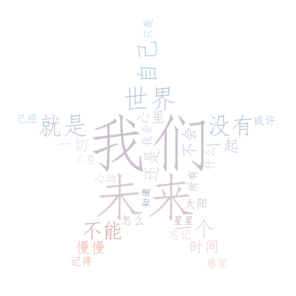

制作完成！


开始制作云音乐热歌榜词云……
[('没有', 81), ('一个', 76), ('怎么', 65), ('我们', 61), ('不会', 58), ('还是', 55), ('世界', 55), ('所有', 46), ('自己', 45), ('心里', 44), ('时间', 39), ('一起', 38), ('记得', 35), ('回忆', 34), ('只是', 34), ('温柔', 33), ('就是', 33), ('知道', 32), ('穿过', 32), ('如果', 31), ('如何', 31), ('不再', 30), ('不能', 30), ('总是', 29), ('飓风', 28), ('想念', 27), ('无法', 27), ('这样', 27), ('可以', 26), ('我要', 26)]


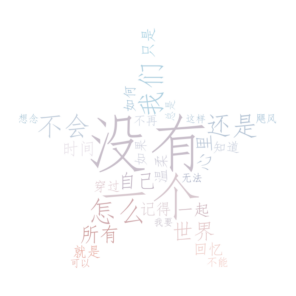

制作完成！


开始制作云音乐新歌榜词云……
[('我们', 65), ('排爆', 52), ('世界', 51), ('自己', 43), ('没有', 42), ('不会', 38), ('一个', 36), ('多少', 34), ('所有', 34), ('一起', 30), ('不要', 29), ('那么', 29), ('心里', 27), ('一样', 27), ('想要', 25), ('永远', 25), ('需要', 24), ('部队', 24), ('时间', 23), ('拆弹', 23), ('知道', 22), ('许嵩', 22), ('灯火', 22), ('不是', 21), ('一切', 20), ('总监', 20), ('什么', 20), ('离开', 20), ('缠住', 20), ('一点', 20)]


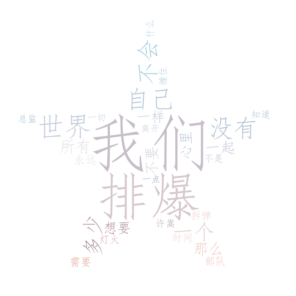

In [3]:
import requests
import sys
import re
import os
# from wordcloud import WordCloud
import matplotlib.pyplot as plt
import jieba
import json
import numpy as np
from lxml import etree
import time
import PIL.Image as image
import jieba.posseg                 # 词性获取
import collections                  # 词频统计库
import numpy                        # numpy数据处理库
from PIL import Image               # 图像处理库
import wordcloud                    # 词云展示库
import matplotlib.pyplot as plt     # 图像展示库（这里以plt代表库的全称）
# from PIL import Image
# 主要功能自定义设置
Analysis_text = 'music_words.txt'        # 分析文档

StopWords = '停用词库.txt'            # 停用词库
number = 30                          # 统计个数
Output = '词频.txt'                   # 输出文件
background = '词频背景.jpg'           # 词频背景

def display(Analysis_text):
    # 读取文件
    fn = open(Analysis_text,'r',encoding = 'UTF-8')  # 打开文件
    string_data = fn.read()                          # 读出整个文件
    fn.close()                                       # 关闭文件

    # 文本预处理
    pattern = re.compile(u'\t|\n|\.|-|:|;|\)|\(|\?|"') # 定义正则表达式匹配模式（空格等）
    string_data = re.sub(pattern, '', string_data)     # 将符合模式的字符去除


    # 文本分词
    seg_list_exact = jieba.cut(string_data, cut_all=False, HMM=True)    # 精确模式分词+HMM
    object_list = []

    # 去除停用词（去掉一些意义不大的词，如标点符号、嗯、啊等）
    with open(StopWords, 'r', encoding='UTF-8') as meaninglessFile:
        stopwords = set(meaninglessFile.read().split('\n'))
    stopwords.add(' ')
    for word in seg_list_exact:         # 循环读出每个分词
        if(len(word)<=1 or (word[0]<='z'and word[0]>='a')or (word[0]<='Z'and word[0]>='A')):
            continue
        if word not in stopwords:       # 如果不在去除词库中
            object_list.append(word)    # 分词追加到列表


    # 词频统计
    word_counts = collections.Counter(object_list)       # 对分词做词频统计
    word_counts_top = word_counts.most_common(number)    # 获取前number个最高频的词

    print(word_counts_top)


                  # 提示当前状态
    mask = numpy.array(Image.open(background))      # 定义词频背景
    wc = wordcloud.WordCloud(
        font_path = 'C:/Windows/Fonts/simfang.ttf', # 设置字体（这里选择“仿宋”）
        background_color='white',                   # 背景颜色
        mask = mask,                                # 文字颜色+形状（有mask参数再设定宽高是无效的）
        max_words = number,                         # 显示词数
        max_font_size = 150                         # 最大字号
    )

    wc.generate_from_frequencies(word_counts)                                        # 从字典生成词云
    wc.recolor(color_func=wordcloud.ImageColorGenerator(mask))                       # 将词云颜色设置为背景图方案
    plt.figure('词云')                                                               # 弹框名称与大小
    plt.subplots_adjust(top=0.99,bottom=0.01,right=0.99,left=0.01,hspace=0,wspace=0) # 调整边距
    plt.imshow(wc, cmap=plt.cm.gray, interpolation='bilinear')                       # 处理词云
    plt.axis('off')                                                                  # 关闭坐标轴
                                                          # 提示当前状态

    plt.show()  
print ('\n开始制作热门榜单词云……')
display('云音乐飙升榜.txt')
print ('制作完成！\n')   
print ('\n开始制作云音乐热歌榜词云……')  
display('云音乐热歌榜.txt')
print ('制作完成！\n')   
 
print ('\n开始制作云音乐新歌榜词云……')  
display('云音乐新歌榜.txt')
# display('bs.txt')
# print ('制作完成！\n')   

# 避免程序运行完成后直接退出


##  分别按年列出新歌歌词中出现频率最高的前30个词，以词云的形式展示

1. jieba 分词统计词频
2. wordcloud以词云形式展示词云



## 1.jieba 分词统计词频

读取歌词保存txt文件中的内容，用jieba 分词， 设置一个停用词库，在循环分词结果时的时候，屏蔽如 "作曲"，“录音棚”， 这种 无用词语，同时去除单字符串和英文单词，用collections，做词频统计，将信息保存进word_counts 中

```python
Analysis_text = 'music_words.txt'        # 分析文档
StopWords = '停用词库.txt'            # 停用词库
number = 30                          # 统计个数
Output = '词频.txt'                   # 输出文件
background = '词频背景.jpg'           # 词频背景

# 读取文件
fn = open(Analysis_text,'r',encoding = 'UTF-8')  # 打开文件
string_data = fn.read()                          # 读出整个文件
fn.close()                                       # 关闭文件

# 文本预处理
pattern = re.compile(u'\t|\n|\.|-|:|;|\)|\(|\?|"') # 定义正则表达式匹配模式（空格等）
string_data = re.sub(pattern, '', string_data)     # 将符合模式的字符去除


# 文本分词
seg_list_exact = jieba.cut(string_data, cut_all=False, HMM=True)    # 精确模式分词+HMM
object_list = []

# 去除停用词（去掉一些意义不大的词，如标点符号、嗯、啊等）
with open(StopWords, 'r', encoding='UTF-8') as meaninglessFile:
    stopwords = set(meaninglessFile.read().split('\n'))
stopwords.add(' ')
for word in seg_list_exact:         # 循环读出每个分词
    if word not in stopwords:       # 如果不在去除词库中
        object_list.append(word)    # 分词追加到列表


# 词频统计
word_counts = collections.Counter(object_list)       # 对分词做词频统计
word_counts_top = word_counts.most_common(number)    # 获取前number个最高频的词

print(word_counts_top)
```

## wordcloud以词云形式展示词云

设置词云背景 字体 背景颜色等参数  将之前统计的word_counts的词频信息进行展示

```python
mask = numpy.array(Image.open(background))      # 定义词频背景
wc = wordcloud.WordCloud(
    font_path = 'C:/Windows/Fonts/simfang.ttf', # 设置字体（这里选择“仿宋”）
    background_color='white',                   # 背景颜色
    mask = mask,                                # 文字颜色+形状（有mask参数再设定宽高是无效的）
    max_words = number,                         # 显示词数
    max_font_size = 150                         # 最大字号
)

wc.generate_from_frequencies(word_counts)                                        # 从字典生成词云
wc.recolor(color_func=wordcloud.ImageColorGenerator(mask))                       # 将词云颜色设置为背景图方案
plt.figure('词云')                                                               # 弹框名称与大小
plt.subplots_adjust(top=0.99,bottom=0.01,right=0.99,left=0.01,hspace=0,wspace=0) # 调整边距
plt.imshow(wc, cmap=plt.cm.gray, interpolation='bilinear')                       # 处理词云
plt.axis('off')                                                                  # 关闭坐标轴
print ('制作完成！')                                                             # 提示当前状态

plt.show()  

# 避免程序运行完成后直接退出
```



<font face='kaiti' size=5 style='line-height:1.5'>

3. 对各热门词曲作者的作品数，流行榜单前10歌手的上榜周数等等进行可视化展示

开始获取云音乐飙升榜榜单歌曲信息
榜单歌曲信息获取成功
开始获取云音乐新歌榜榜单歌曲信息
榜单歌曲信息获取成功
开始获取云音乐热歌榜榜单歌曲信息
榜单歌曲信息获取成功
开始获取抖音排行榜榜单歌曲信息
榜单歌曲信息获取成功


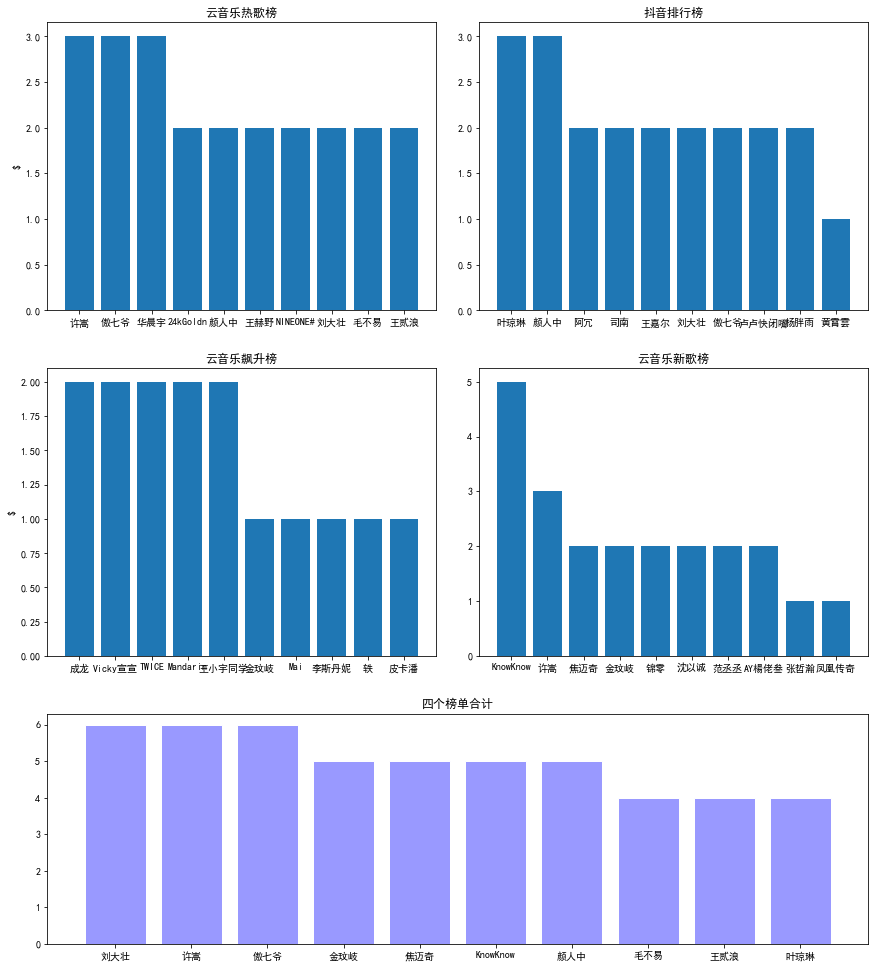

In [89]:
import requests
import sys
import re
import os
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import jieba
import json

import numpy as np
from lxml import etree
import time

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



import PIL.Image as image
import matplotlib.pyplot as plt
%matplotlib inline
# from PIL import Image




headers = {
		'Referer'	:'http://music.163.com',
		'Host'	 	:'music.163.com',
		'Accept' 	:'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8',
		'User-Agent':'Chrome/10'
	}



def get_songs(id):
	page_url = 'https://music.163.com/api/playlist/detail?id='+id
	# 获取网页HTML
	res = requests.request('GET', page_url, headers=headers)

	a = res.json()

	a= a['result']['tracks'][0:100]
	# print(a[0])

	song_ids = []
	song_names = []
	songer_names = []
	for i in range(0, len(a)):
		song_ids.append(a[i]['id'])
		song_names.append(a[i]['name'])
		songer_names.append(a[i]['artists'][0]['name'])
	# print(song_ids)
	return song_ids, song_names,songer_names



List = [
    {
       'name': '云音乐飙升榜',
        'id':'19723756',
    },
    {
       'name': '云音乐新歌榜',
        'id':'3779629',
    },
    {
       'name': '云音乐热歌榜',
        'id':'3778678',
    },
    {
       'name': '抖音排行榜',
        'id':'2250011882',
    }
]
songer_name_list = []
all_songer_name = []
for i in range(0, len(List)):
    print('开始获取'+List[i]['name']+'榜单歌曲信息')
    time.sleep(10)
    [song_ids, song_names,songer_names] = get_songs(List[i]['id'])
    all_songer_name = all_songer_name+ songer_names
    word_counts = collections.Counter(songer_names)       # 对分词做词频统计
    word_counts_top = word_counts.most_common(10)    # 获取前number个最高频的词
    songer_name_list.append(word_counts_top)
    print('榜单歌曲信息获取成功')
word_counts = collections.Counter(all_songer_name)
word_counts_top = word_counts.most_common(10) 
songer_name_list.append(word_counts_top)


x1,x2,x3,x4,x5= [],[],[],[],[]
y1,y2,y3,y4,y5= [],[],[],[],[]
for i in range(0, 10):
    x1.append(songer_name_list[0][i][0])
    x2.append(songer_name_list[1][i][0])
    x3.append(songer_name_list[2][i][0])
    x4.append(songer_name_list[3][i][0])
    x5.append(songer_name_list[4][i][0])

    y1.append(songer_name_list[0][i][1])
    y2.append(songer_name_list[1][i][1])
    y3.append(songer_name_list[2][i][1])
    y4.append(songer_name_list[3][i][1])
    y5.append(songer_name_list[4][i][1])


plt.rcParams['font.sans-serif'] = 'SimHei'  
plt.rcParams['axes.unicode_minus'] = False 

plt.subplot(223)  # 子图1
plt.plot(x1, y1, 'o-')
plt.title('A tale of 2 subplots')
plt.ylabel('Damped oscillation')

plt.axes([0,1,0.9,1])  # 子图1
plt.bar(x1, y1)
plt.title("云音乐飙升榜")
plt.ylabel("$")
plt.axes([1,1,0.9,1])  # 子图2
plt.bar(x2, y2)
plt.title("云音乐新歌榜")


plt.subplot(224)  # 子图1
plt.axes([0,2.2,0.9,1])  # 子图3
plt.bar(x3, y3)
plt.title("云音乐热歌榜")
plt.ylabel("$")
plt.axes([1,2.2,0.9,1])  # 子图4
plt.bar(x4, y4)
plt.title("抖音排行榜")




plt.axes([0,0,1.9,0.8])  #子图5
plt.bar(x5, y5, facecolor='#9999ff', edgecolor='white')
plt.title("四个榜单合计")


plt.show()


# 对各热门词曲作者的作品数，流行榜单前10歌手的上榜周数等等进行可视化展示

# 收集某音乐网站或榜单近年来华语新歌的歌词

目标收集网易云音乐的榜单中前两百歌曲的歌词

1. 获取歌手姓名
2. 统计歌手出现次数
3. 作图



## 1.获取歌手姓名

**https://music.163.com/api/playlist/detail?id=3778678接口获取 榜单信息，然后从榜单信息中获取歌手姓名，设置一个songer_name列表 去遍历榜单信息中的歌曲 然后保存 姓名 

```python
def get_songs(id):
	page_url = 'https://music.163.com/api/playlist/detail?id='+id
	# 获取网页HTML
	res = requests.request('GET', page_url, headers=headers)

	a = res.json()

	a= a['result']['tracks'][0:100]
	# print(a[0])

	song_ids = []
	song_names = []
	songer_names = []
	for i in range(0, len(a)):
		song_ids.append(a[i]['id'])
		song_names.append(a[i]['name'])
		songer_names.append(a[i]['artists'][0]['name'])
	# print(song_ids)
	return song_ids, song_names,songer_names

List = [
    {
       'name': '云音乐飙升榜',
        'id':'19723756',
    },
    {
       'name': '云音乐新歌榜',
        'id':'3779629',
    },
    {
       'name': '云音乐热歌榜',
        'id':'3778678',
    },
    {
       'name': '抖音排行榜',
        'id':'2250011882',
    }
]
songer_name_list = []
all_songer_name = []
for i in range(0, len(List)):
    print('开始获取'+List[i]['name']+'榜单歌曲信息')
    time.sleep(10)
    [song_ids, song_names,songer_names] = get_songs(List[i]['id'])
    all_songer_name = all_songer_name+ songer_names
    word_counts = collections.Counter(songer_names)       # 对歌手名做词频统计
    word_counts_top = word_counts.most_common(10)    # 获取前10个最高频的词
    songer_name_list.append(word_counts_top)
    print('榜单歌曲信息获取成功')
word_counts = collections.Counter(all_songer_name)
word_counts_top = word_counts.most_common(10) 
songer_name_list.append(word_counts_top)


```



## 2.统计歌手出现次数

利用上面统计的歌手名单

调用collections库 统计歌手出现次数

```python
for i in range(0, len(List)):
    print('开始获取'+List[i]['name']+'榜单歌曲信息')
    time.sleep(10)
    [song_ids, song_names,songer_names] = get_songs(List[i]['id'])
    all_songer_name = all_songer_name+ songer_names
    word_counts = collections.Counter(songer_names)       # 对歌手名做词频统计
    word_counts_top = word_counts.most_common(10)    # 获取前10个最高频的词
    songer_name_list.append(word_counts_top)
    print('榜单歌曲信息获取成功')
word_counts = collections.Counter(all_songer_name)
word_counts_top = word_counts.most_common(10) 
songer_name_list.append(word_counts_top)
```



## 3.作图

首先先将songer_name_list 里面的数据提取到对应的列表中，如 songer_name_list[0]为x1的数据

songer_name_list[0 ] [i] [0]表示[0]表示数据下标，[i]表示十个词中的第几个歌手信息，[0],为姓名

songer_name_list = [ [('成龙',2),('周杰伦',2) .....等共10个] ,[('王菲',2,'张杰',2).....等共十个]] 

 然后作图

```python
x1,x2,x3,x4,x5= [],[],[],[],[]
y1,y2,y3,y4,y5= [],[],[],[],[]
for i in range(0, 10):
    x1.append(songer_name_list[0][i][0])
    x2.append(songer_name_list[1][i][0])
    x3.append(songer_name_list[2][i][0])
    x4.append(songer_name_list[3][i][0])
    x5.append(songer_name_list[4][i][0])

    y1.append(songer_name_list[0][i][1])
    y2.append(songer_name_list[1][i][1])
    y3.append(songer_name_list[2][i][1])
    y4.append(songer_name_list[3][i][1])
    y5.append(songer_name_list[4][i][1])


plt.rcParams['font.sans-serif'] = 'SimHei'  
plt.rcParams['axes.unicode_minus'] = False 

plt.subplot(223)  # 子图1
plt.plot(x1, y1, 'o-')
plt.title('A tale of 2 subplots')
plt.ylabel('Damped oscillation')

plt.axes([0,1,0.9,1])  # 子图1
plt.bar(x1, y1)
plt.title("云音乐飙升榜")
plt.ylabel("$")
plt.axes([1,1,0.9,1])  # 子图2
plt.bar(x2, y2)
plt.title("云音乐新歌榜")


plt.subplot(224)  # 子图1
plt.axes([0,2.2,0.9,1])  # 子图3
plt.bar(x3, y3)
plt.title("云音乐热歌榜")
plt.ylabel("$")
plt.axes([1,2.2,0.9,1])  # 子图4
plt.bar(x4, y4)
plt.title("抖音排行榜")




plt.axes([0,0,1.9,0.8])  #子图5
plt.bar(x5, y5, facecolor='#9999ff', edgecolor='white')
plt.title("四个榜单合计")


plt.show()
```

